### global fundation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

#### test

$\kappa C_1,\kappa C_2\to\text{Gyr}^{-1}$  
$\kappa=\dfrac{\langle\sigma v\rangle}{M_x}\to\dfrac{\text{cm}^3\text{s}^{-1}}{\text{GeV}}$  
$\dfrac{8\pi GC_1}{3H_0^2}=\Omega_{1,0}=1-\Omega_{2,0}$

In [2]:
# caculate kappa
import astropy.units as u
import astropy.constants as const

G = const.G
c = const.c

kC1 = 1e-4 / u.Gyr
O20 = 0.3
H0 = 70 * u.km / u.s / u.Mpc

f = 3 * (100*u.km/u.s/u.Mpc)**2 / (8 * np.pi * G) * c**2
f = f * 1e-23 * u.cm**3 /u.s * u.Gyr
f = f.to(u.GeV)

C1 = (1 - O20) * 3 * H0**2 / (8 * np.pi * G)

kappa = kC1 / C1 / (c**2)

kappa = kappa.to(u.cm**3 / u.s / u.GeV)

print(f"kappa={kappa:.2e}")

kappa=8.77e-16 cm3 / (GeV s)


$\langle\sigma v\rangle\sim 10^{-23}\text{cm}^3\text{s}^{-1}$

$\langle\sigma v\rangle C_1=M_x\cdot\kappa C_1\to\text{GeV}\cdot\text{Gyr}^{-1}$

In [3]:
section = 1e-23 * u.cm**3 / u.s

cross = section * C1 * c**2

cross = cross.to(u.GeV / u.Gyr)

print(f"cross={cross:.2e}")

cross=1.14e-12 GeV / Gyr


### function solution

$z''(t)=\frac{H_0^4\kappa C_1\Omega_{1,0}^2(z(t)^4+1)+3H_0^4\Omega_{1,0}^2z(t)^2(2\kappa C_1-3z'(t))+H_0^4\Omega_{1,0}^2z(t)^3(4\kappa C_1-3z'(t))-3H_0^4\Omega_{1,0}^2z'(t)+5H_0^2\Omega_{1,0}z'(t)^3-\kappa C_1z'(t)^4+H_0^2\Omega_{1,0}z(t)(4H_0^2\kappa C_1\Omega_{1,0}-9H_0^2\Omega_{1,0}z'(t)+5z'(t)^3)}{2H_0^2\Omega_{1,0}(1+z(t))^2z'(t)}$

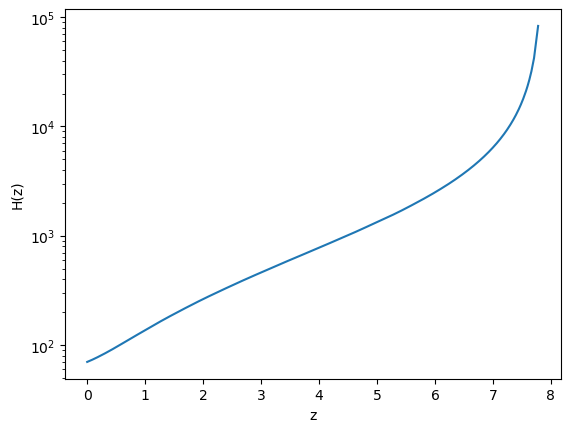

In [4]:
from solution import solution

z = solution(-2.0, 0.3, 70)
a = 1/(1 + z.y[0,:])
dota = -z.y[1,:] * a**2
h = dota/a

plt.plot(z.y[0,:], h)
plt.xlabel('z')
plt.ylabel('H(z)')
plt.yscale('log')
plt.show()

该方程存在刚性点,刚性点与$\log kC_1$有关

100%|██████████| 10000/10000 [34:41<00:00,  4.80it/s]


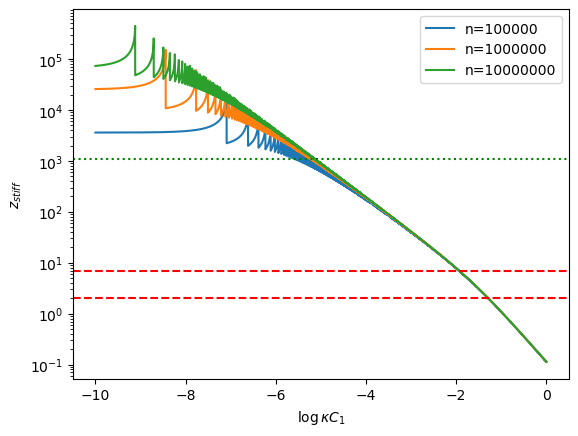

In [3]:
from solution import solution
from tqdm import tqdm

logkC1_list = np.linspace(-10,0,10000)
z_list_1,z_list_2,z_list_3 = [],[],[]
for i in tqdm(range(10000)):
    logkC1 = logkC1_list[i]
    z_1 = solution(log_kC1=logkC1, O20=0.3, H0=70, n=100000)
    z_2 = solution(log_kC1=logkC1, O20=0.3, H0=70, n=1000000)
    z_3 = solution(log_kC1=logkC1, O20=0.3, H0=70, n=10000000)
    z_list_1.append(z_1.y[0,-1])
    z_list_2.append(z_2.y[0,-1])
    z_list_3.append(z_3.y[0,-1])

plt.plot(logkC1_list, z_list_1, label='n=100000')
plt.plot(logkC1_list, z_list_2, label='n=1000000')
plt.plot(logkC1_list, z_list_3, label='n=10000000')
plt.axhline(y=2,c='r',linestyle='--')
plt.axhline(y=7,c='r',linestyle='--')
plt.axhline(y=1090,c='g',linestyle=':')
plt.xlabel(r'$\log\kappa C_1$')
plt.ylabel(r'$z_{stiff}$')
plt.yscale('log')
plt.legend()
plt.show()

$\ln\mathcal{L}=-\dfrac{1}{2}\chi^2-\dfrac{1}{2}\ln|Cov|-\dfrac{n}{2}\ln(2\pi)$

$\chi^2=\Delta^{T}(Cov)^{-1}\Delta$

### OHD(only CC)

$H(z)=-\dfrac{1}{1+z}\dfrac{\text{d}z}{\text{d}t}$

100%|██████████| 2000/2000 [05:00<00:00,  6.65it/s]


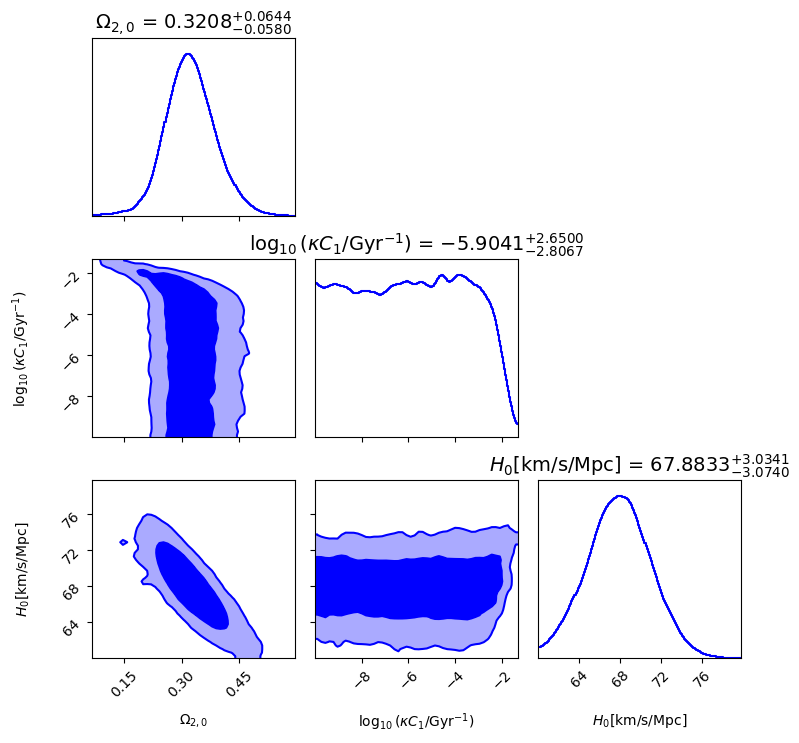

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


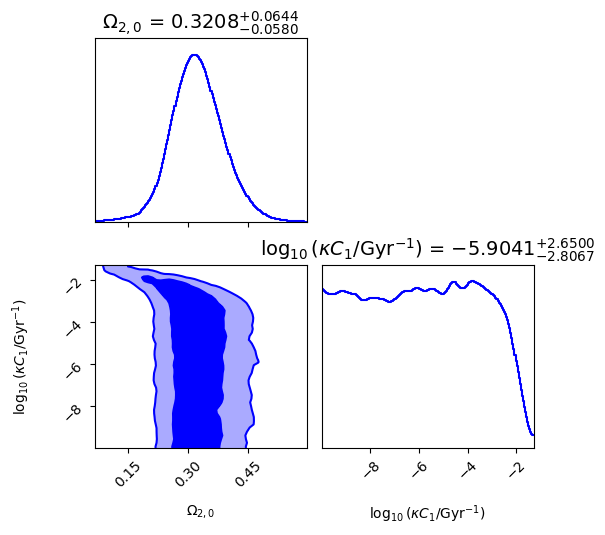

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


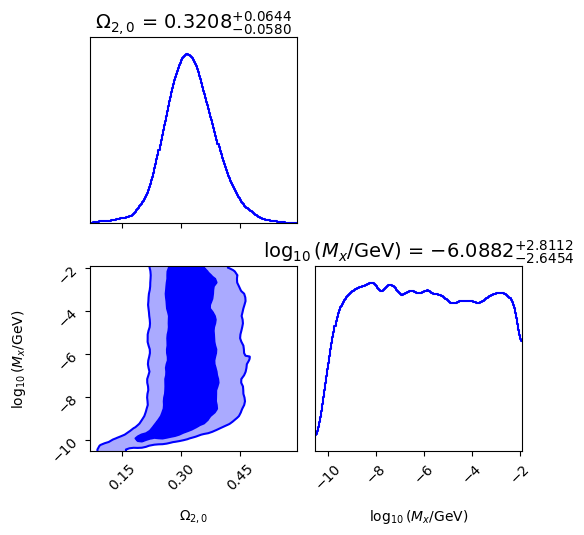

In [5]:
import multiprocessing as mp
from OHD.result import main

if __name__ == '__main__':
    mp.freeze_support()
    main()

### SNe Ia

$\displaystyle d_L=c(1+z)\int_0^z\frac{dz'}{H(z')}=c(1+z)\left[t_0-t+\int_t^{t_0}z(t')dt'\right]$

$m=M+5\log(d_L)+25$

In [5]:
# use the cov instead of err_mu
import numpy as np
from solution import solution
from solution import const_c
from SNe.result2 import chi_square
file_path_cov = './SNe/Pantheon+ data/Pantheon+SH0ES_cov.dat'
cov = np.loadtxt(file_path_cov, skiprows=1)
cov_matrix = cov.reshape((1701, 1701))

file_path = "./SNe/Pantheon+ data/Pantheon+SH0ES.dat"
pandata = np.loadtxt(file_path, skiprows=1, usecols=(2, 10, 11))
z_hd = pandata[:, 0]
mu = pandata[:, 1]
err_mu = pandata[:, 2]

t0 = 1 / 70
t_values = solution(-3.0, 0.3, 70).t
z_values = solution(-3.0, 0.3, 70).y[0, :]
dl_values = []

for z_hz_value in z_hd:
    idx = np.searchsorted(z_values, z_hz_value)
    if idx >= len(z_values):  
        idx = len(z_values) - 1
    int_value = -np.trapz(z_values[:idx], t_values[:idx])
    dl_value = const_c * (1 + z_hz_value) * (t0 - t_values[idx] + int_value)
    dl_values.append(dl_value)

dl = np.array(dl_values)
muth = 5 * np.log10(dl) + 25

delta_mu = muth - mu
chi2_1 = np.sum(delta_mu**2/err_mu**2)
chi2_2 = np.dot(delta_mu, np.dot(np.linalg.inv(cov_matrix), delta_mu))
print(chi2_1,chi2_2)

1184.566115303315 2583.607174334809


100%|██████████| 2000/2000 [1:29:14<00:00,  2.68s/it]


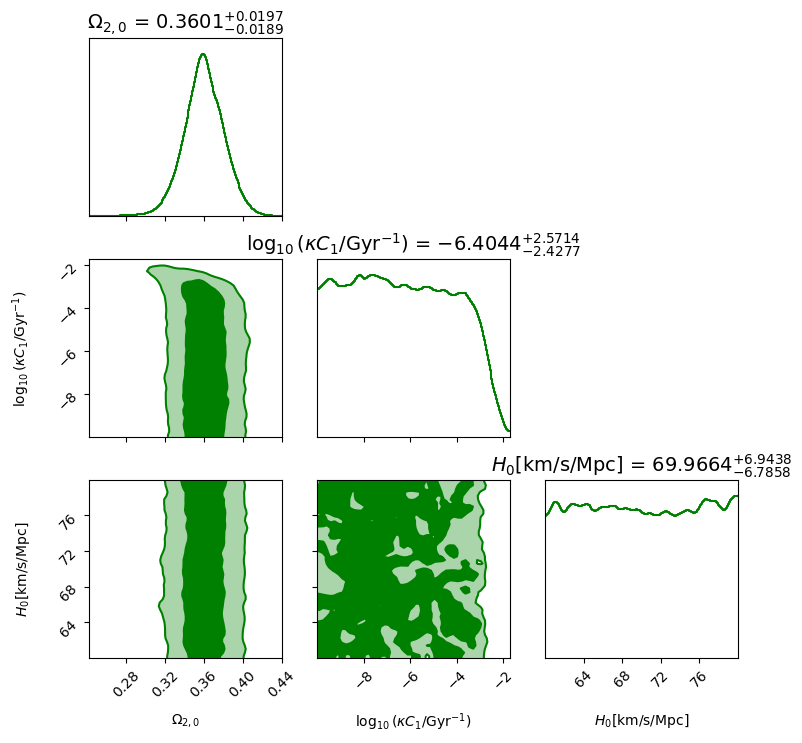

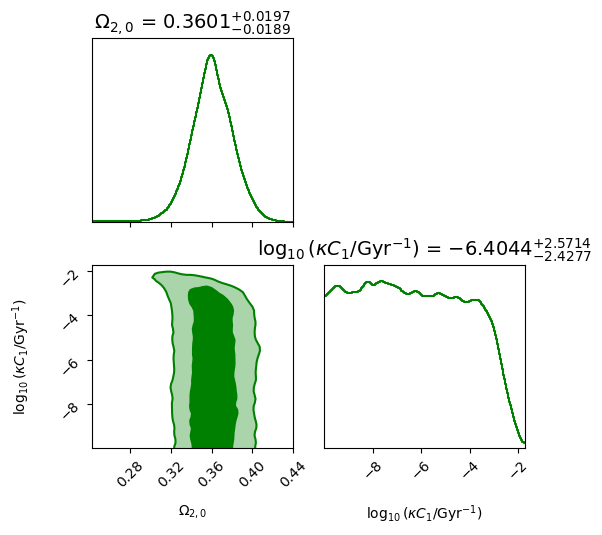

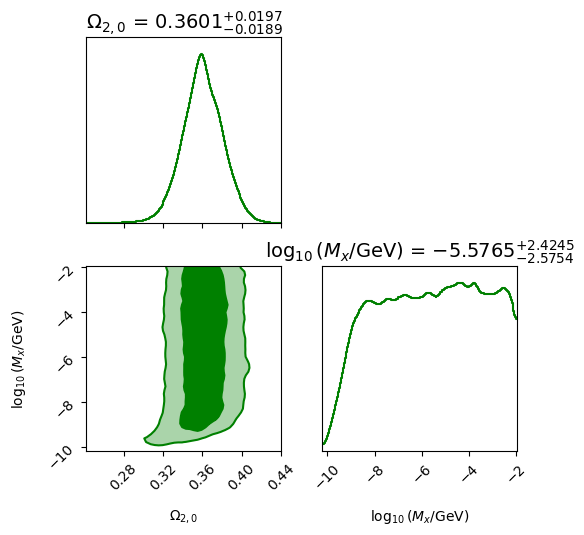

In [1]:
# chi2_1
import multiprocessing as mp
from SNe.result1 import main

if __name__ == '__main__':
    mp.freeze_support()
    main()

100%|██████████| 2000/2000 [1:23:02<00:00,  2.49s/it]


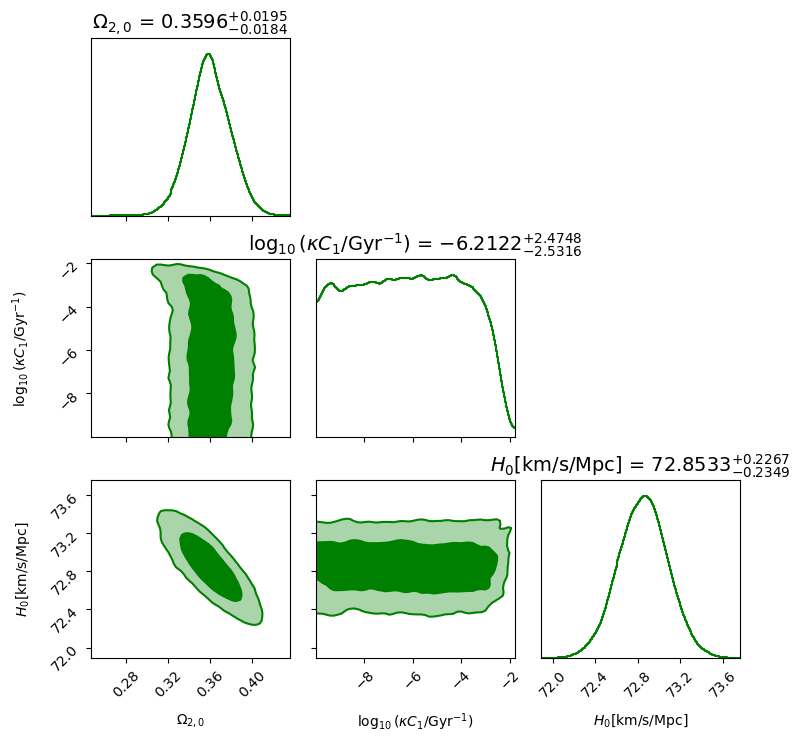

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


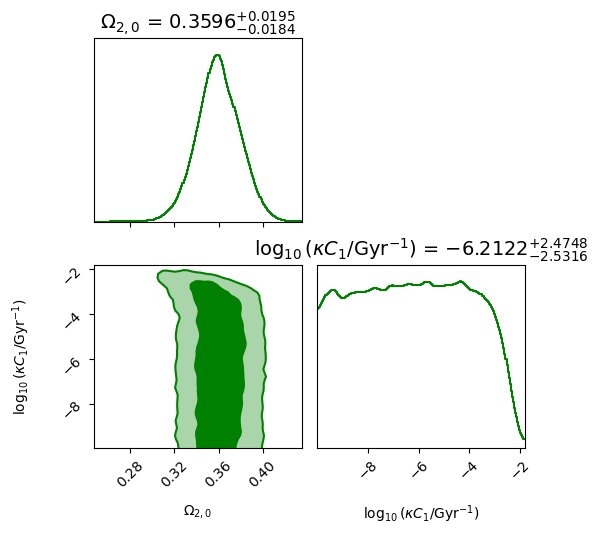

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


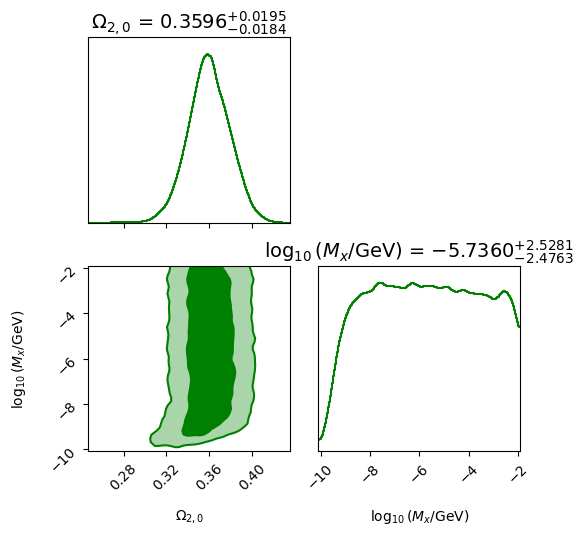

In [1]:
# chi2_2
import multiprocessing as mp
from SNe.result2 import main

if __name__ == '__main__':
    mp.freeze_support()
    main()

### QSO

$\log(F_X)=\beta+(\gamma-1)\log(4\pi)+\gamma\log(F_{UV})+2(\gamma-1)\log(d_L)$  
$\log=\log_{10}$

$DM(z)=\dfrac{5}{2(\gamma-1)}[\log(F_X)-\gamma\log(F_{UV})-\beta']$  
$\beta'=\beta+(\gamma-1)\log(4\pi)$

$DM(z)=5\log(d_L(z)/Mpc)+25$

$\ln (\mathcal{L}) = -\dfrac{1}{2}\sum\biggl\{ \dfrac{{{{\left [ {{{\log }_{10}}{{({F_{X}})}_{i}} - \Phi ({{[{F_{UV}}]}_{i}},{d_{L}}[{z_{i}}])} \right ]}^{2}}}}{{\tilde{\sigma}_{i}^{2}}}+ \ln (2\pi \tilde{\sigma}_{i}^{2})\biggr\}$  
$\tilde{\sigma}_{i}^{2} \equiv {\delta ^{2}} + \sigma _{i}^{2}$

100%|██████████| 2500/2500 [33:36<00:00,  1.24it/s]


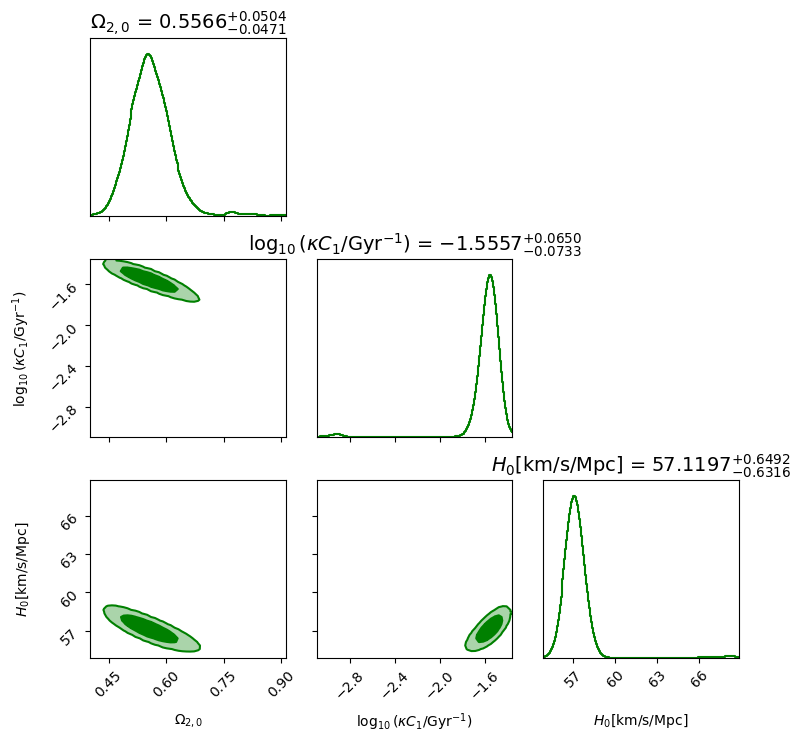

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


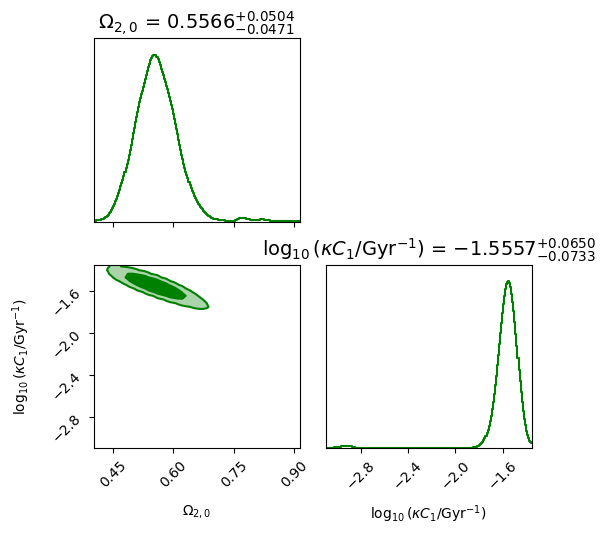

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


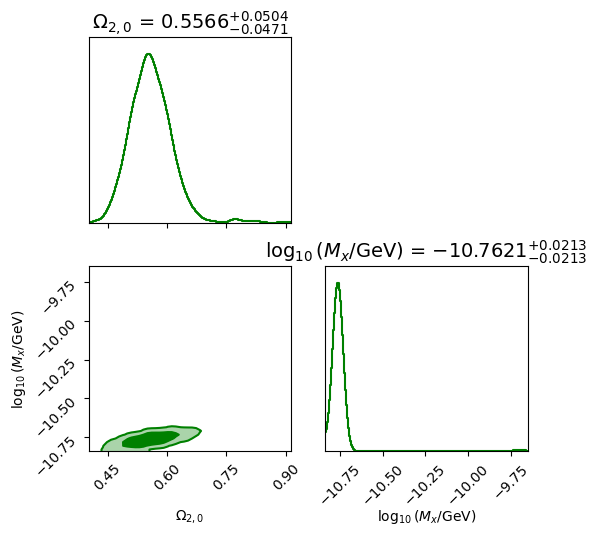

In [1]:
# DM
import multiprocessing as mp
from QSO.result1 import main

if __name__ == '__main__':
    mp.freeze_support()
    main()

100%|██████████| 2500/2500 [32:57<00:00,  1.26it/s]


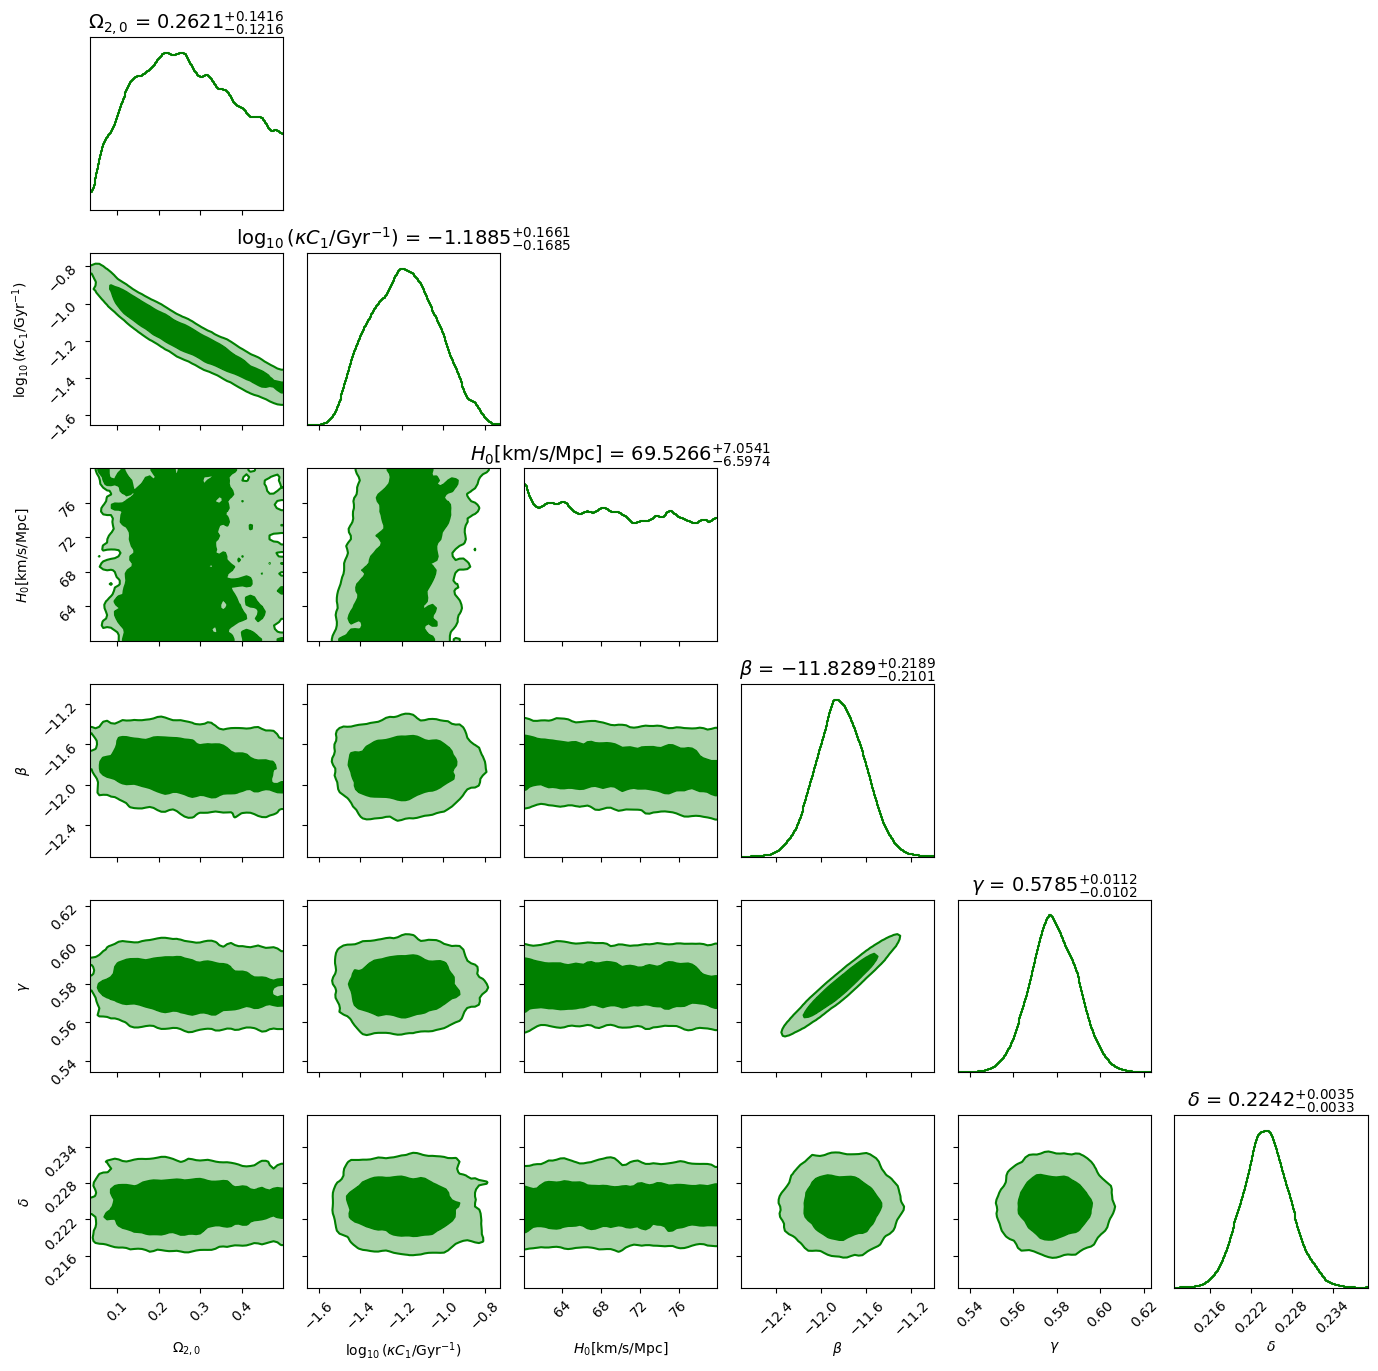

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


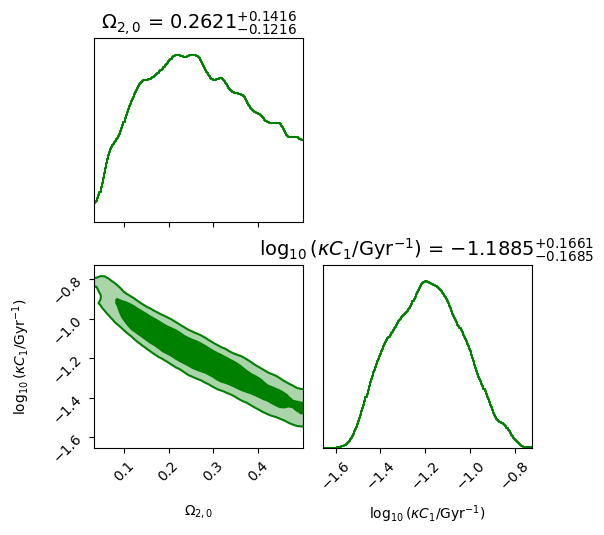

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


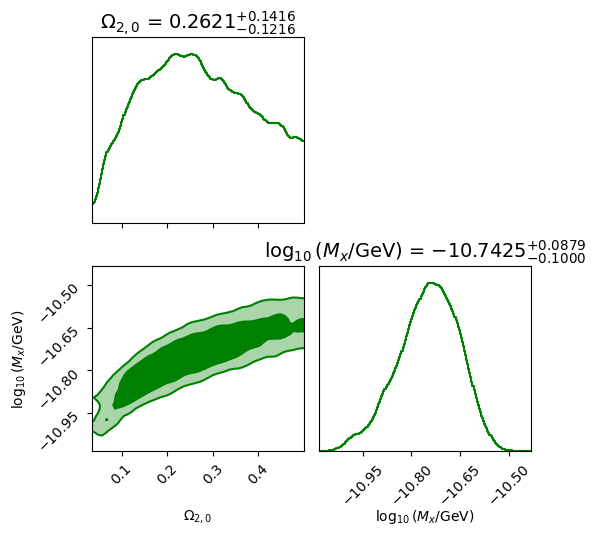

In [2]:
# FX
import multiprocessing as mp
from QSO.result2 import main

if __name__ == '__main__':
    mp.freeze_support()
    main()

### BAO

$\displaystyle D_M(z)=\frac{c}{H_0\sqrt{\Omega_K}}\sinh\left[\sqrt{\Omega_K}\int_0^z\frac{\text{d}z'}{H(z')/H_0}\right]=r_d/\Delta\theta\\$  
when $\displaystyle\Omega_k\to0,D_M(z)=c\int_0^z\frac{\text{d}z'}{H(z')}$

$D_H(z)=c/H(z)=r_d/\Delta z$

$F_{AP}(z)=D_M(z)/D_{H}(z)$

$\displaystyle D_V(z)=(zD_M(z)^2D_H(z))^{1/3}=c\left[z\left(\int_0^z\frac{\text{d}z'}{H(z')}\right)^2\frac{1}{H(z)}\right]^{1/3}$

$\displaystyle r_d=\int_{z_d}^{\infty}\frac{c_s(z)}{H(z)}\text{d}z$

$\displaystyle c_s(z)=\frac{c}{\sqrt{3\left(1+\dfrac{3\rho_B(z)}{4\rho_{\gamma}(z)}\right)}}$

/Users/kaltsit33/Library/CloudStorage/OneDrive-Personal/Yixuan Zhu/Astro-Physics/IDM/solution.py:29: RuntimeWarning: overflow encountered in scalar power
  kC1 * z[1]**4 +
/Users/kaltsit33/Library/CloudStorage/OneDrive-Personal/Yixuan Zhu/Astro-Physics/IDM/solution.py:24: RuntimeWarning: invalid value encountered in scalar subtract
  H0**4 * kC1 * O10**2 * (z[0]**4 + 1) +
/Users/kaltsit33/Library/CloudStorage/OneDrive-Personal/Yixuan Zhu/Astro-Physics/IDM/solution.py:33: RuntimeWarning: invalid value encountered in scalar divide
  dz2 = numerator / denominator
100%|██████████| 2000/2000 [03:05<00:00, 10.78it/s]


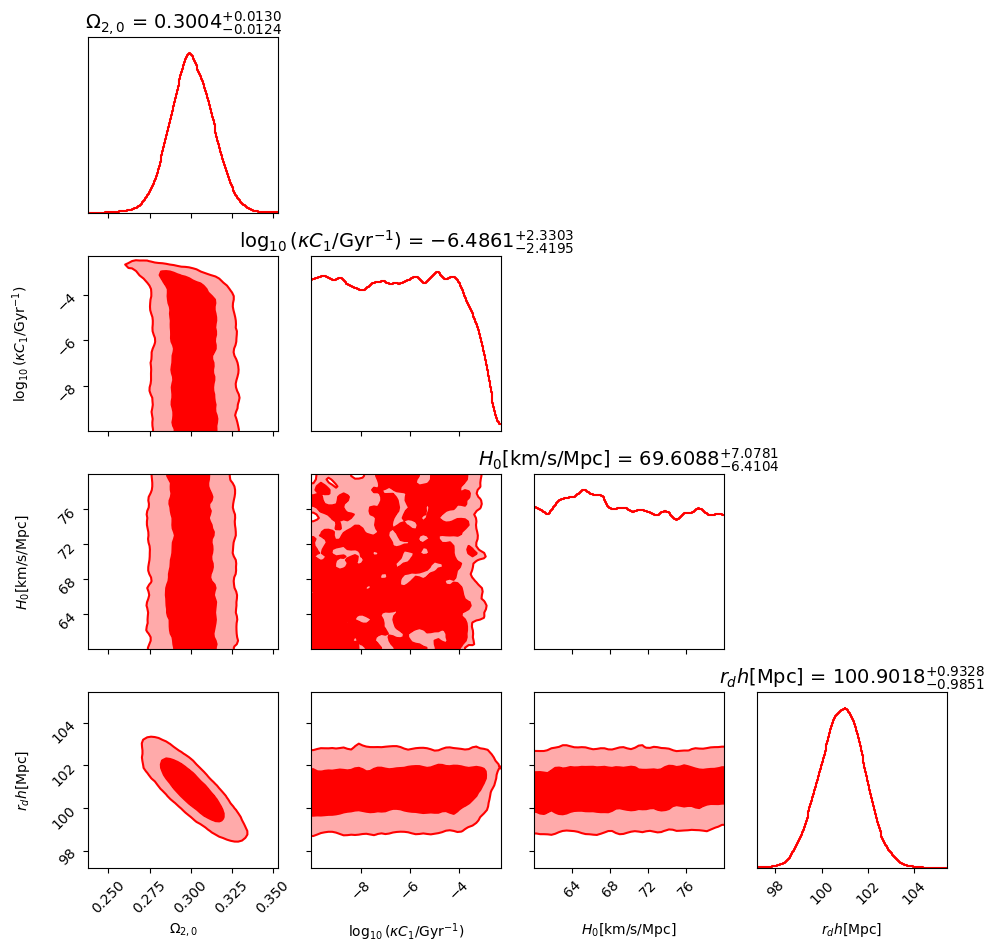

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


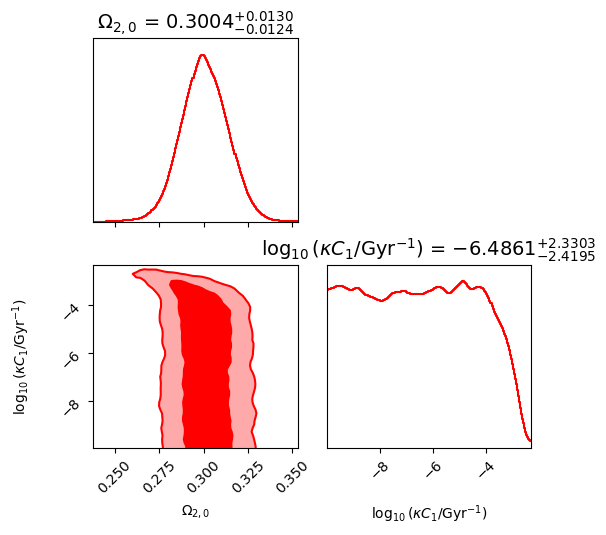

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


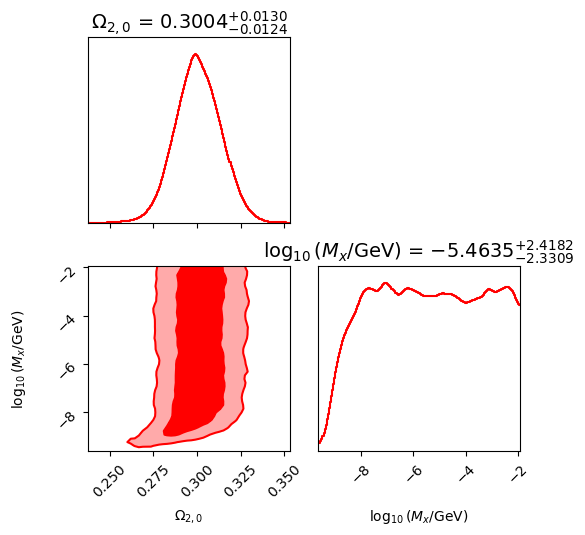

In [8]:
import multiprocessing as mp
from BAO.result import main

if __name__ == '__main__':
    mp.freeze_support()
    main()

### CMB

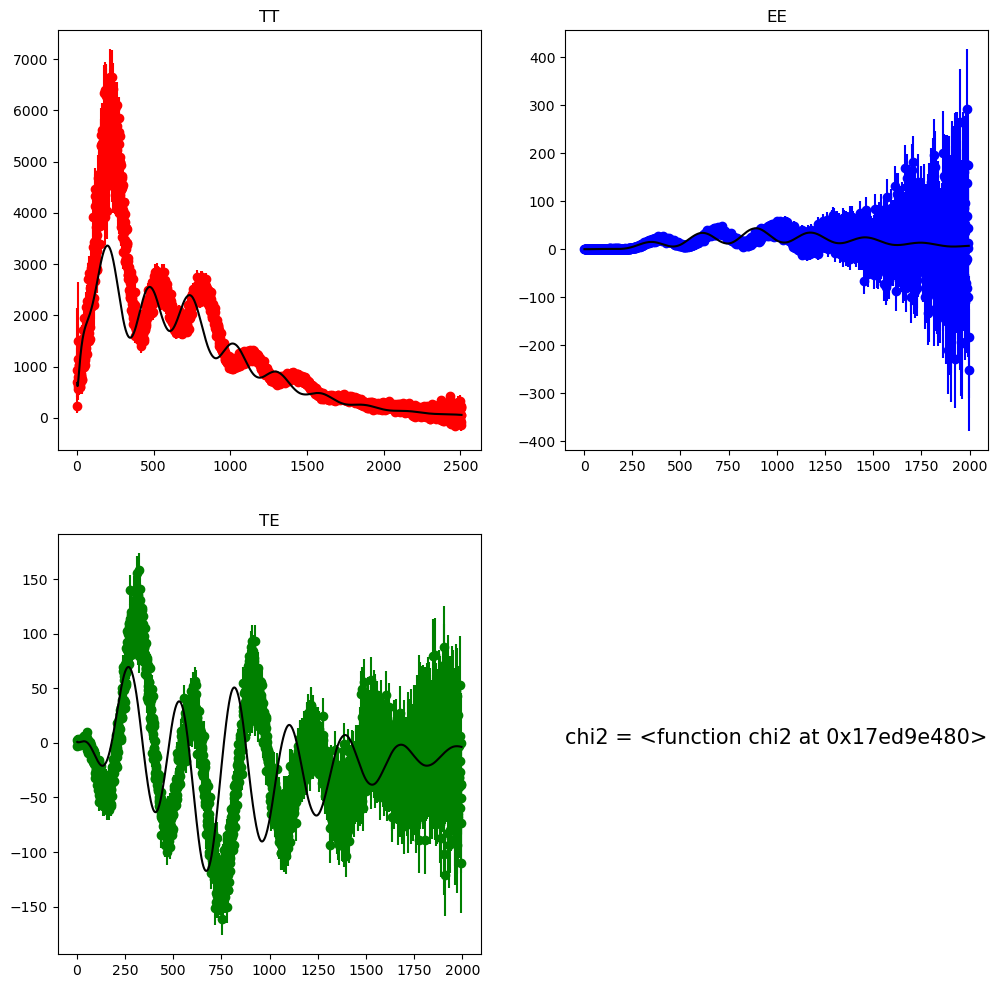

In [1]:
from CMB.test import plot
plot(-6.7, 0.3, 67.5)

  1%|          | 29/3000 [00:09<16:36,  2.98it/s]/Users/kaltsit33/Library/CloudStorage/OneDrive-Personal/Yixuan Zhu/Astro-Physics/IDM/CMB/test.py:92: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  r_z = scipy.integrate.quad(lambda t: (1+z0(t)), t_z.root, t0)
  1%|          | 35/3000 [00:11<15:52,  3.11it/s]/Users/kaltsit33/Library/CloudStorage/OneDrive-Personal/Yixuan Zhu/Astro-Physics/IDM/CMB/test.py:92: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  r_z = scipy.integrate.quad(lambda t: (1+z0(t)), t_z.root, t0)
  2%|▏         | 51/3000 [00:16<15:12,  3.23it/s]/Users/kaltsit33/Library/CloudStorage/OneDrive-Personal/Yixuan Zhu/Astro-Physics/IDM/CMB/test.py:92: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the re

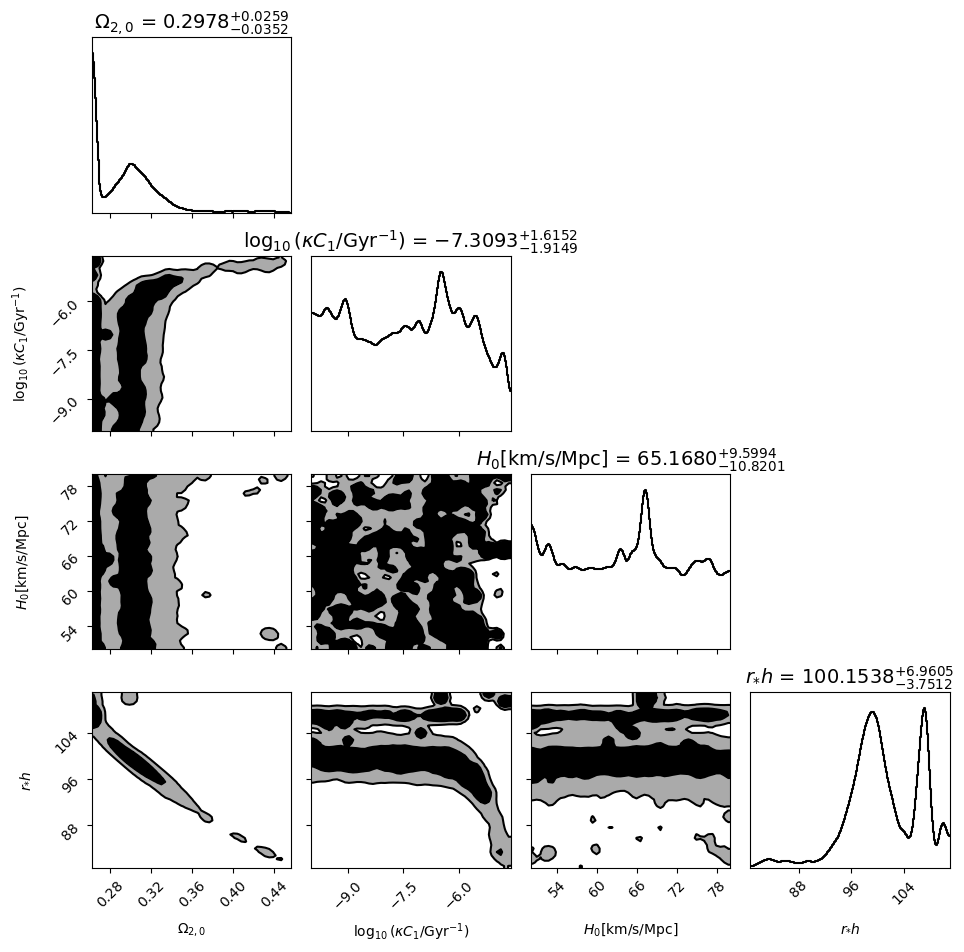

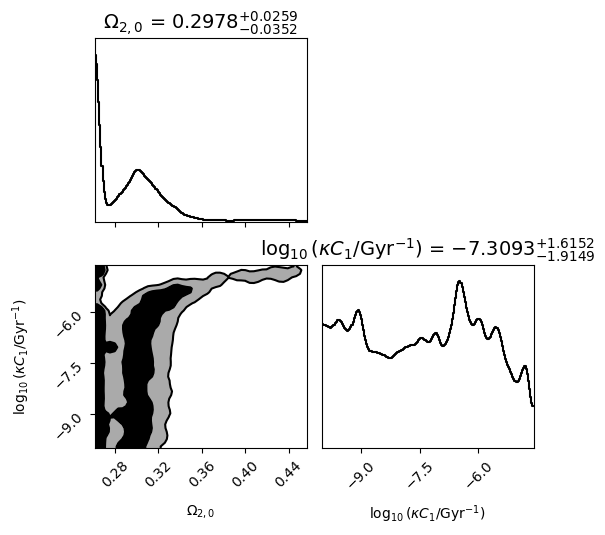

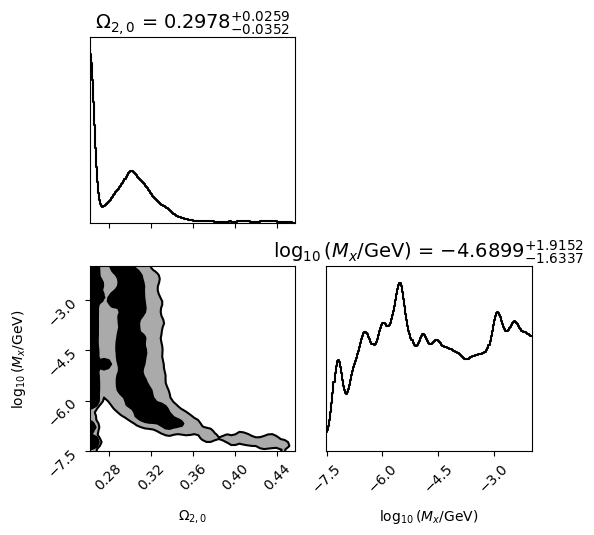

In [1]:
# reduced cmb paras
import multiprocessing as mp
from CMB.test import main

if __name__ == '__main__':
    mp.freeze_support()
    main()

### combination

100%|██████████| 2000/2000 [1:32:06<00:00,  2.76s/it]


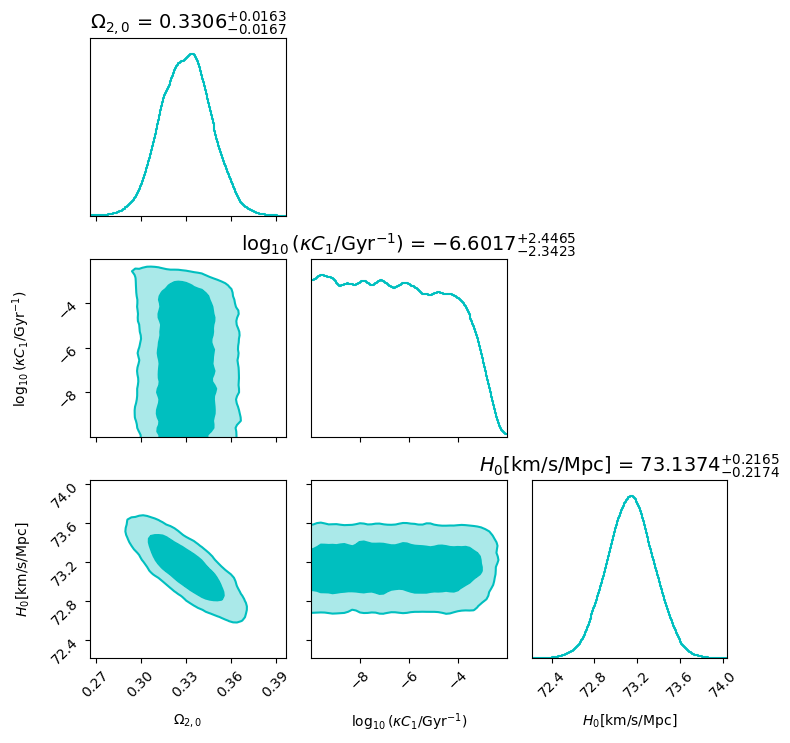

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


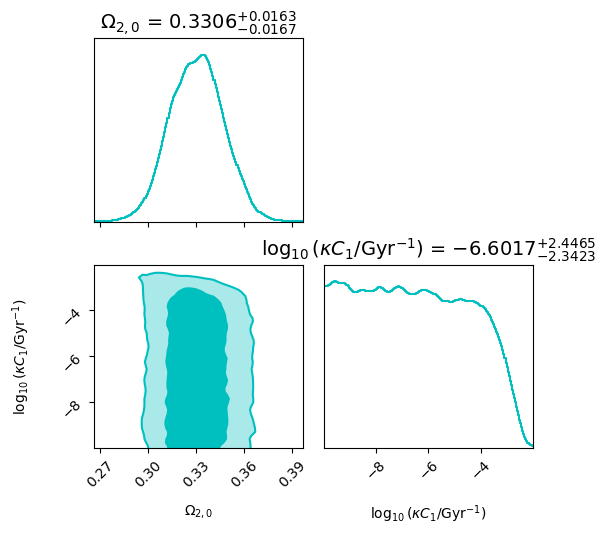

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


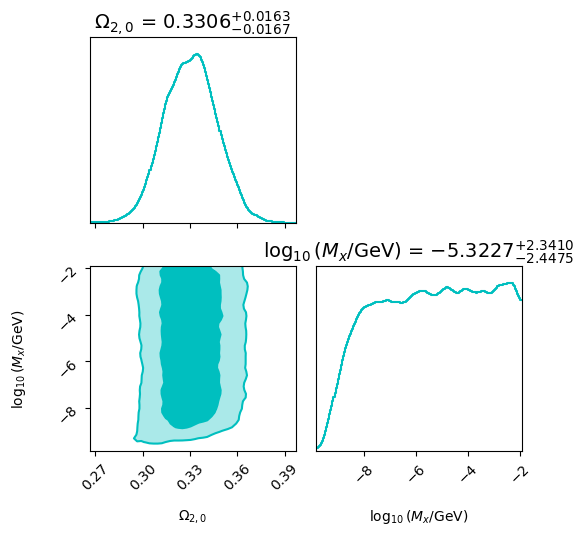

In [2]:
import multiprocessing as mp
from multimethods.methods2 import main

if __name__ == '__main__':
    mp.freeze_support()
    main()

100%|██████████| 2000/2000 [1:40:46<00:00,  3.02s/it]


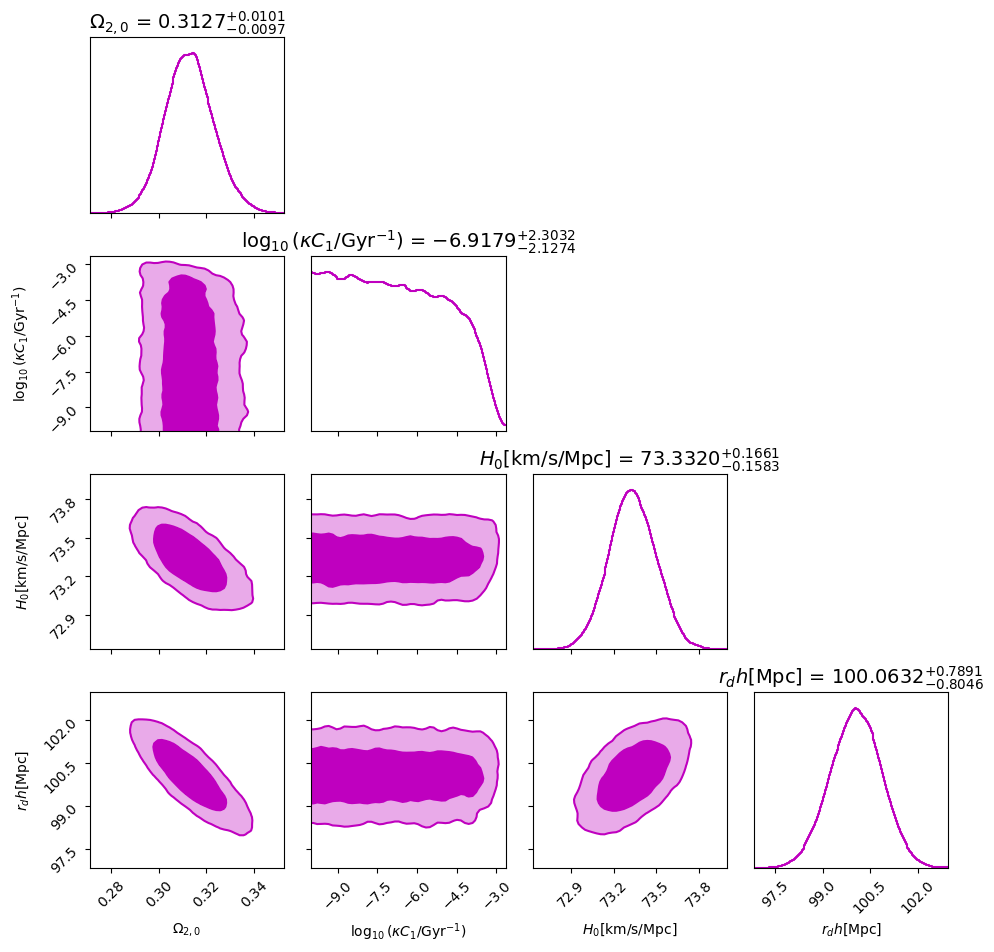

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


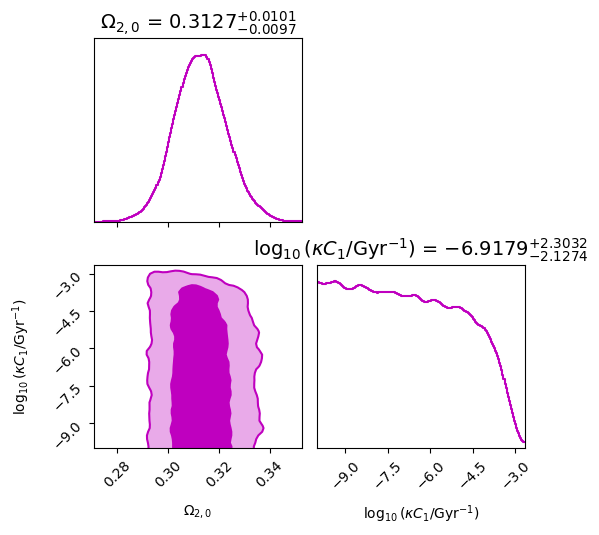

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


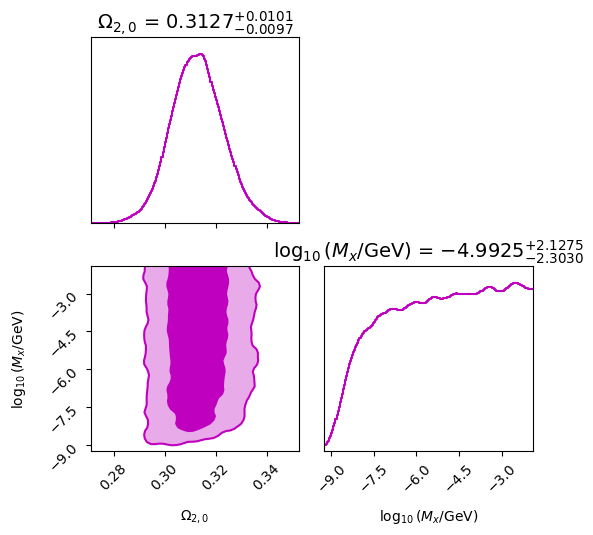

In [3]:
import multiprocessing as mp
from multimethods.methods3 import main

if __name__ == '__main__':
    mp.freeze_support()
    main()

### wIDM

$\left(\dfrac{H}{H_0}\right)^2=\Omega_{1,0}(1+z)^{-n}+\Omega_{2,0}(1+z)^3$

100%|██████████| 5000/5000 [00:06<00:00, 808.48it/s]


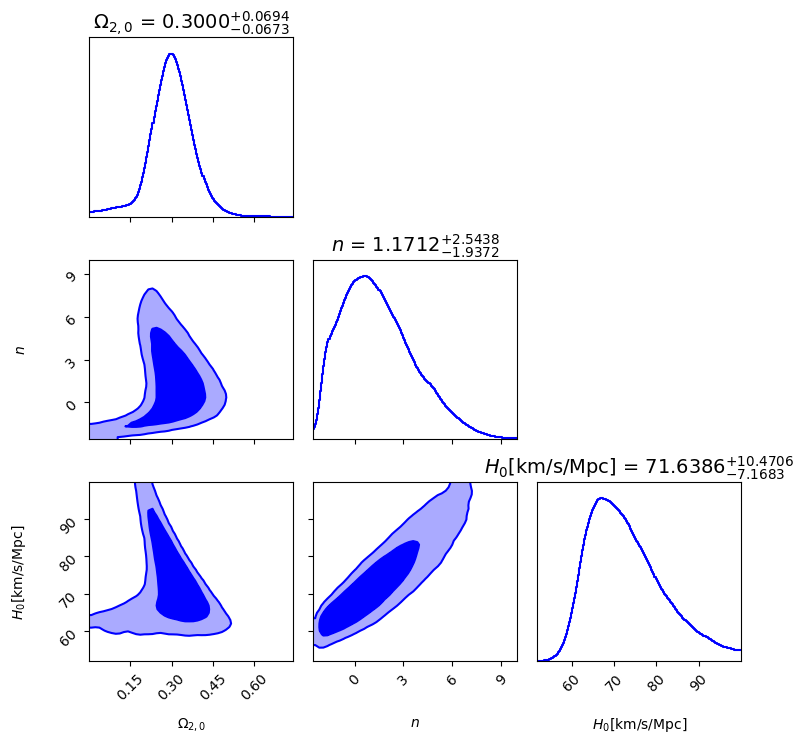

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


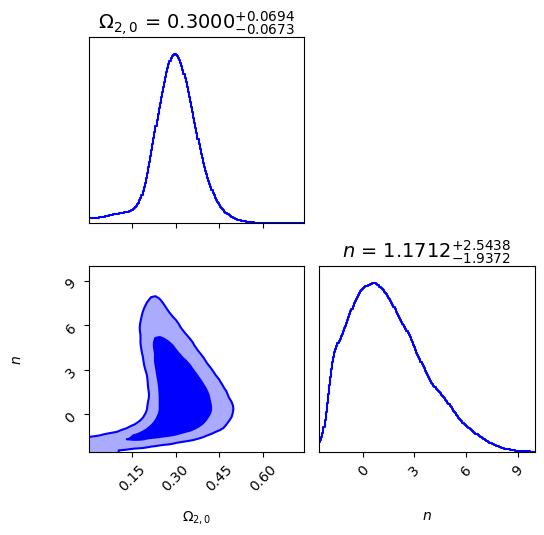

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


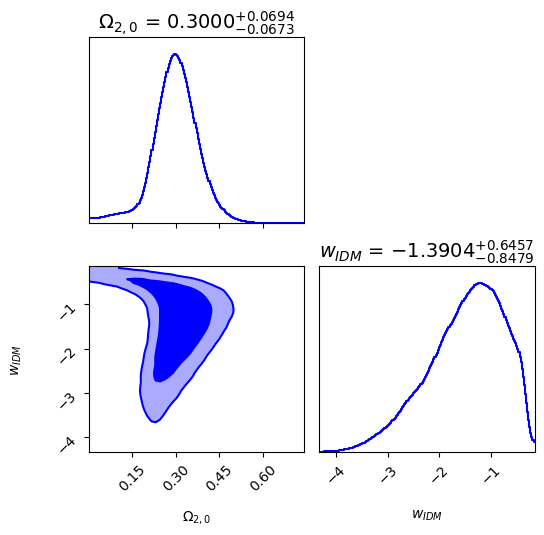

In [2]:
import multiprocessing as mp
from wIDM.OHD import main

if __name__ == '__main__':
    mp.freeze_support()
    main()

100%|██████████| 2000/2000 [52:22<00:00,  1.57s/it]


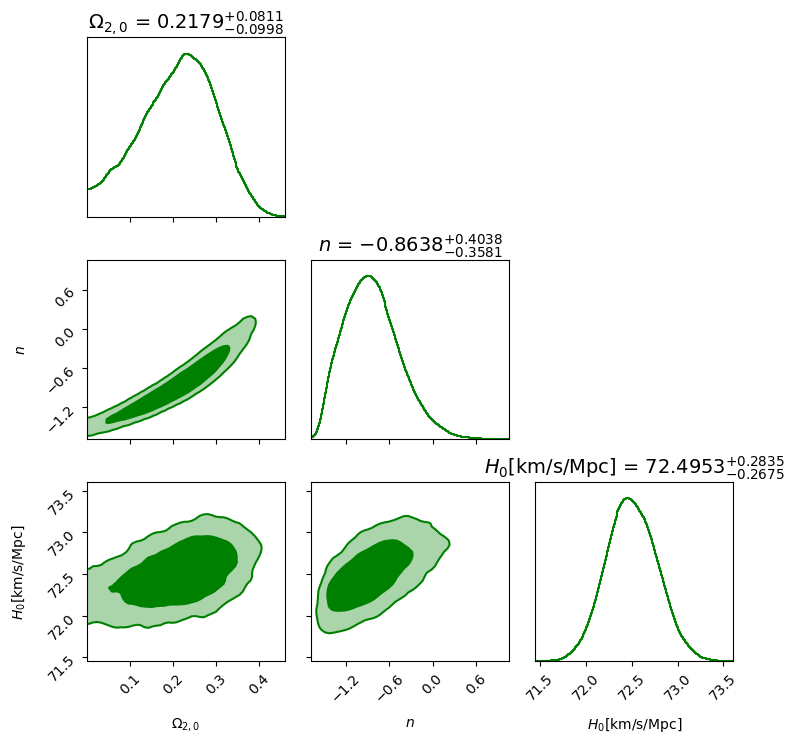

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


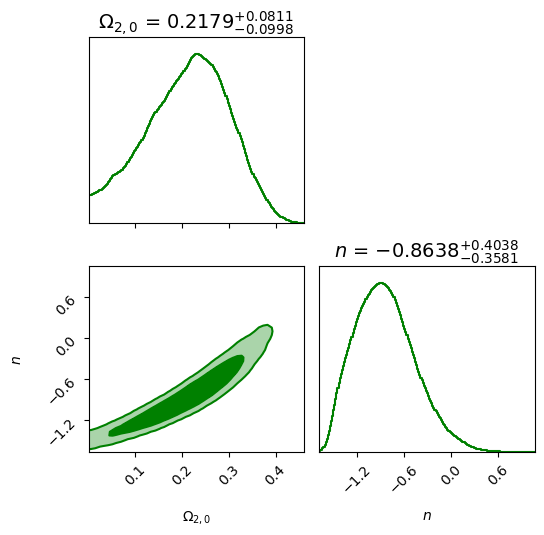

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


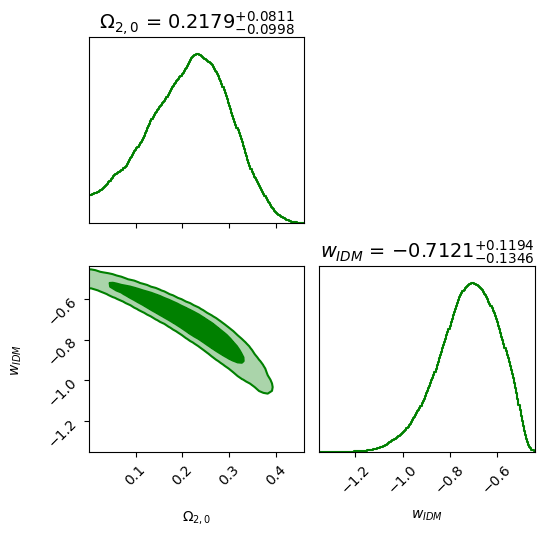

In [6]:
import multiprocessing as mp
from wIDM.SNe import main

if __name__ == '__main__':
    mp.freeze_support()
    main()

100%|██████████| 2500/2500 [08:58<00:00,  4.64it/s]


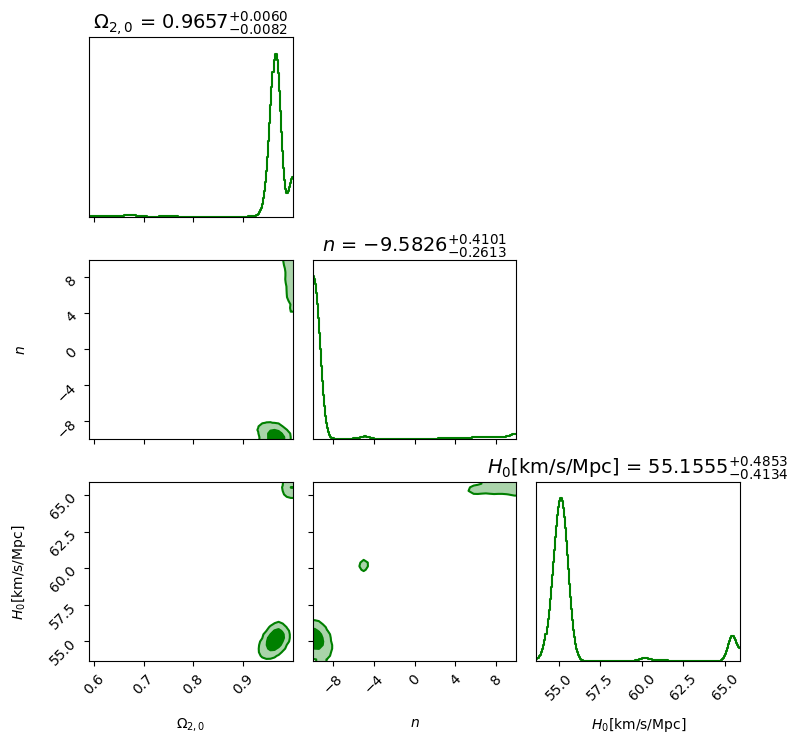

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


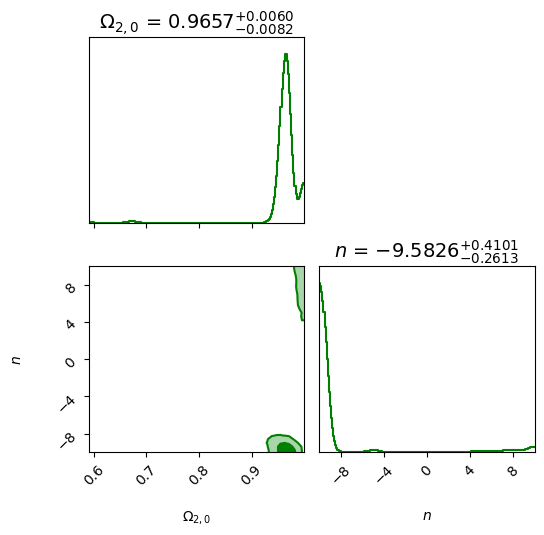

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


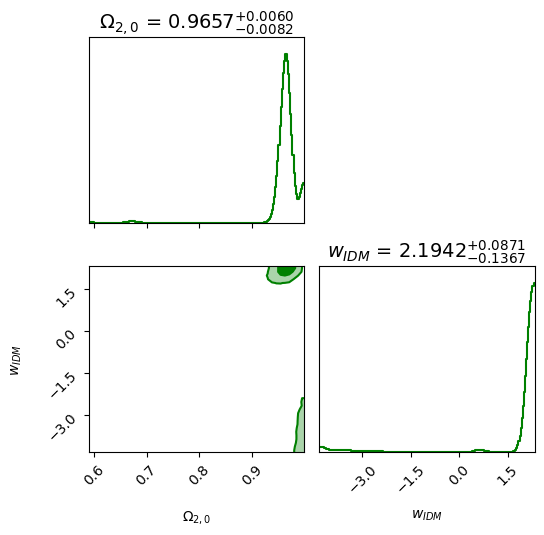

In [1]:
import multiprocessing as mp
from wIDM.QSO import main

if __name__ == '__main__':
    mp.freeze_support()
    main()

100%|██████████| 5000/5000 [00:10<00:00, 463.94it/s]


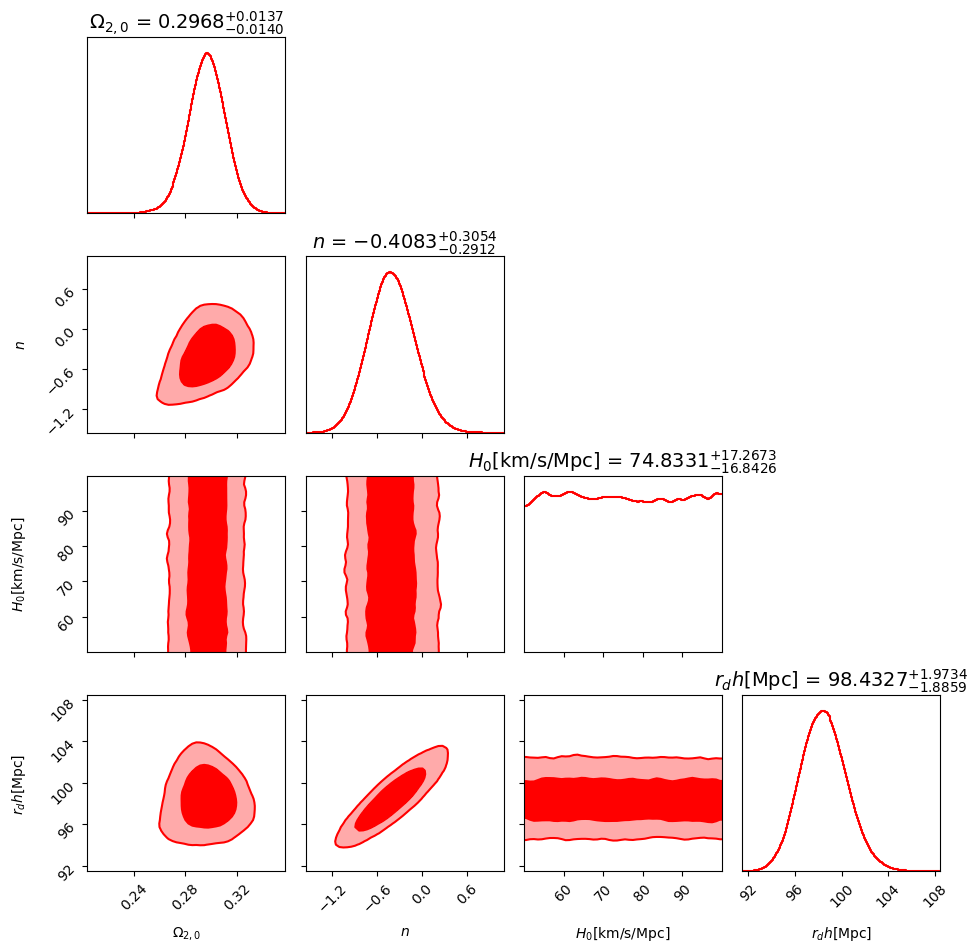

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


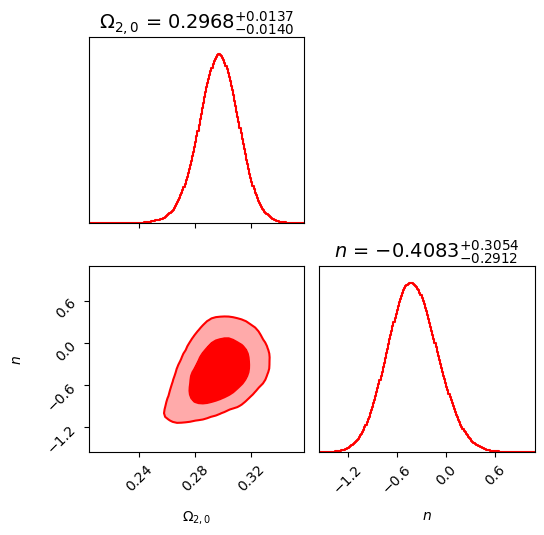

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


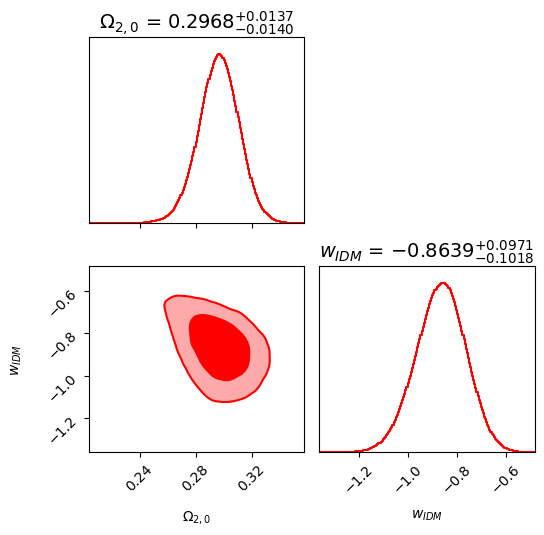

In [ ]:
import multiprocessing as mp
from wIDM.BAO import main

if __name__ == '__main__':
    mp.freeze_support()
    main()

100%|██████████| 2000/2000 [57:13<00:00,  1.72s/it]


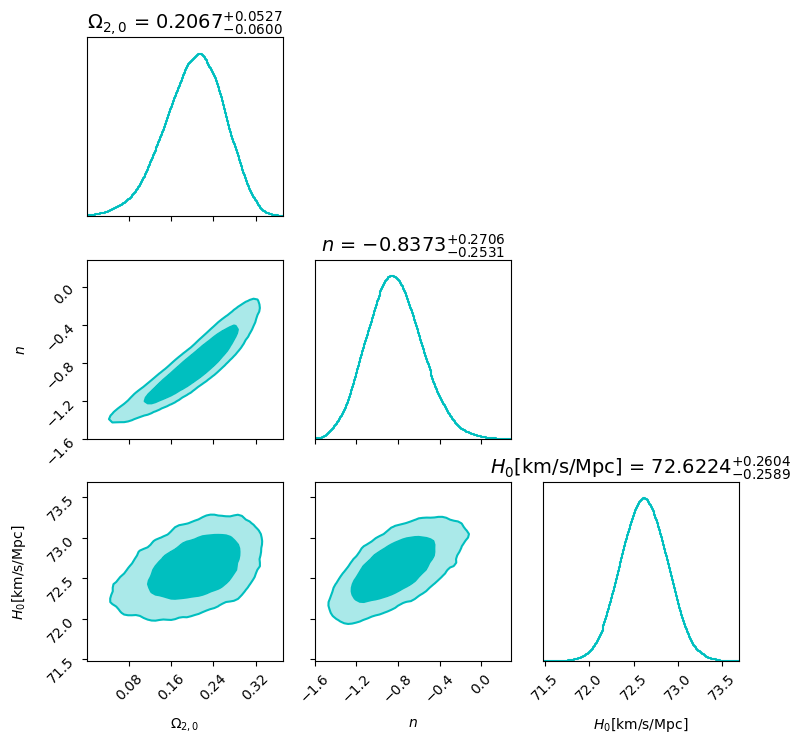

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


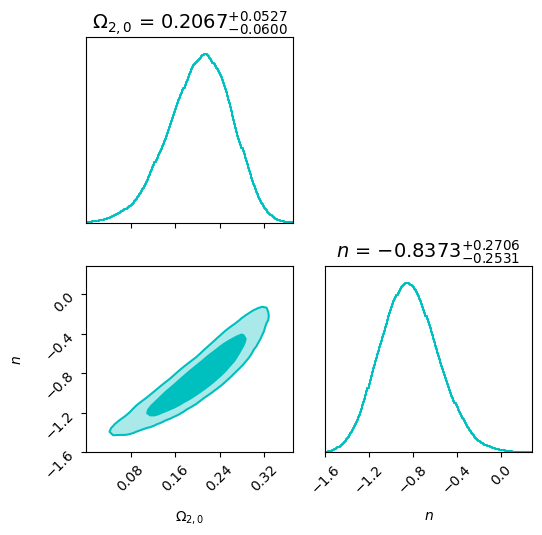

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


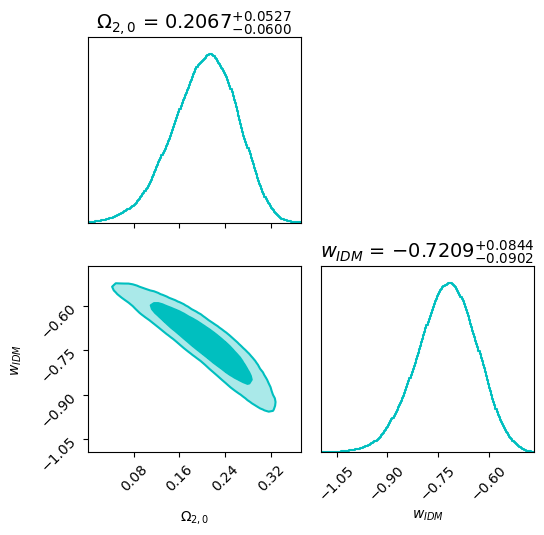

In [4]:
import multiprocessing as mp
from wIDM.methods2 import main

if __name__ == '__main__':
    mp.freeze_support()
    main()

100%|██████████| 2000/2000 [58:12<00:00,  1.75s/it]


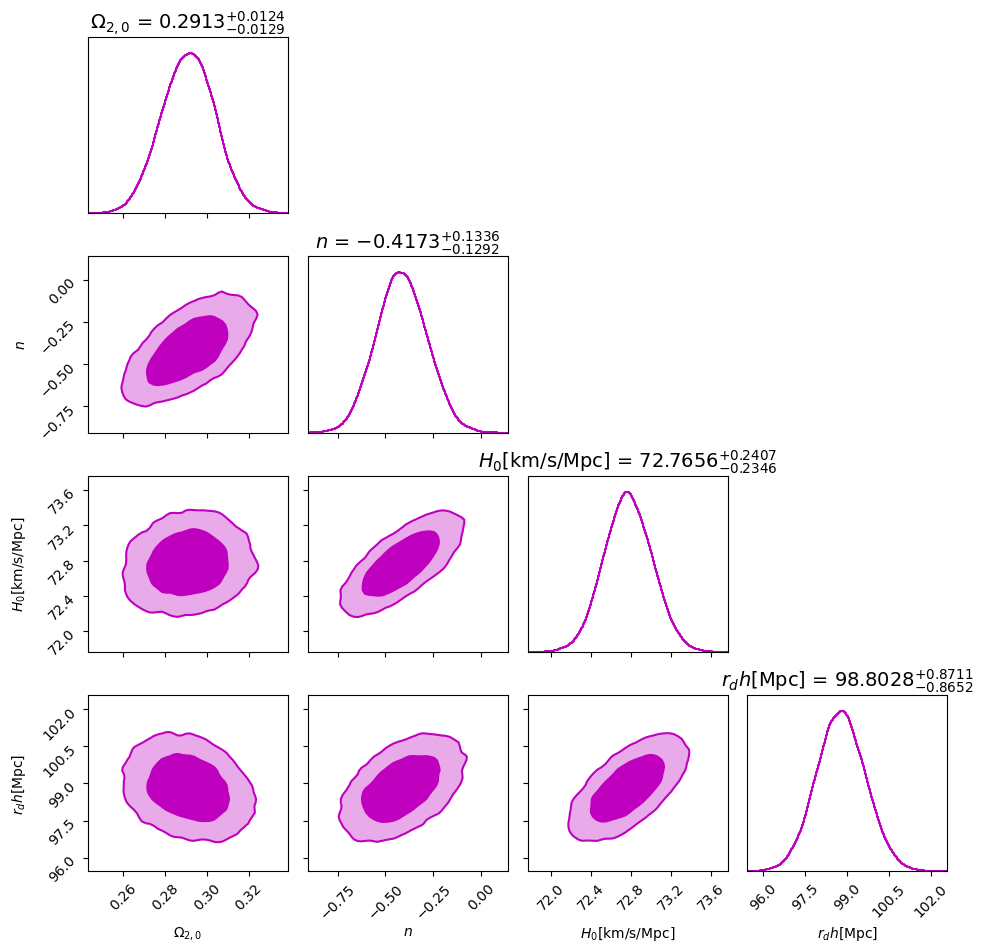

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


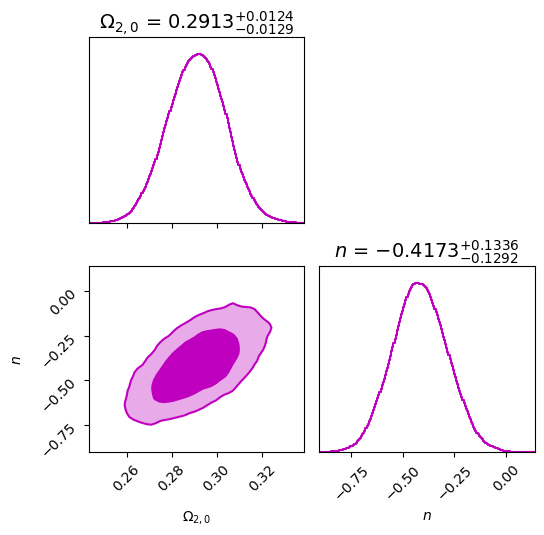

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


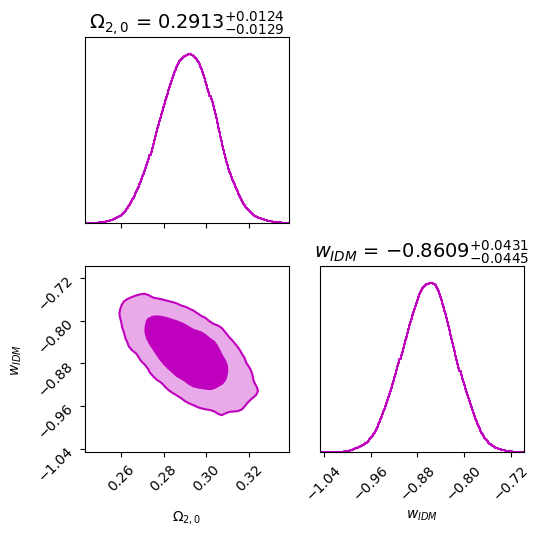

In [3]:
import multiprocessing as mp
from wIDM.methods3 import main

if __name__ == '__main__':
    mp.freeze_support()
    main()

### $\Omega_{2,0}$ gaussian pdf & $\log_{10}{\kappa}C_1/M_x$ cdf

100%|██████████| 2000/2000 [1:32:26<00:00,  2.77s/it]
/Users/kaltsit33/Library/CloudStorage/OneDrive-Personal/Yixuan Zhu/Astro-Physics/IDM/solution.py:29: RuntimeWarning: overflow encountered in scalar power
  kC1 * z[1]**4 +
/Users/kaltsit33/Library/CloudStorage/OneDrive-Personal/Yixuan Zhu/Astro-Physics/IDM/solution.py:24: RuntimeWarning: invalid value encountered in scalar subtract
  H0**4 * kC1 * O10**2 * (z[0]**4 + 1) +
/Users/kaltsit33/Library/CloudStorage/OneDrive-Personal/Yixuan Zhu/Astro-Physics/IDM/solution.py:33: RuntimeWarning: invalid value encountered in scalar divide
  dz2 = numerator / denominator
100%|██████████| 2000/2000 [1:41:34<00:00,  3.05s/it]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


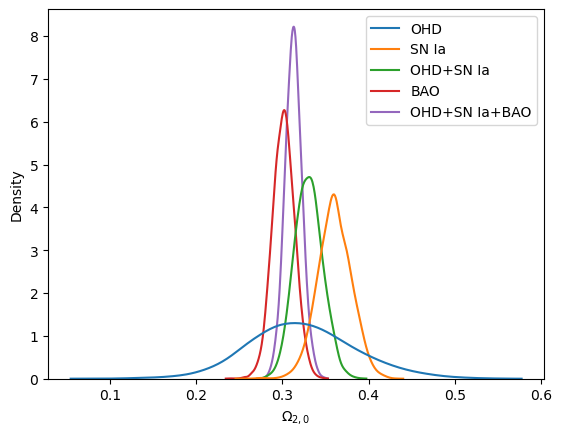

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


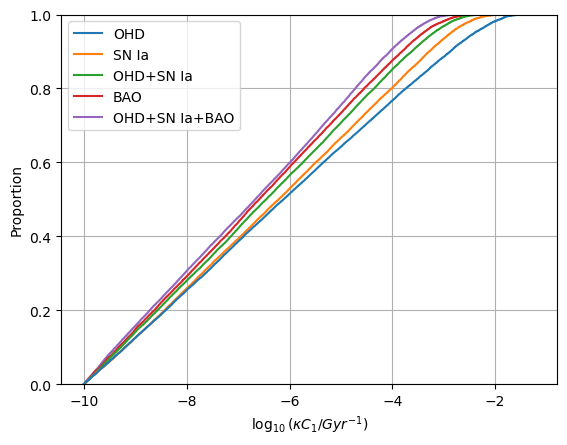

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


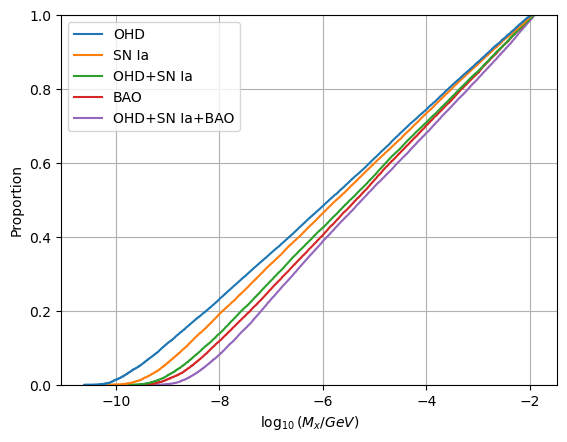

In [1]:
import multiprocessing as mp
from pdf_cdf import main

if __name__ == '__main__':
    mp.freeze_support()
    main()